In [2]:
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

print(__doc__)

import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

###############################################################################
# Generate data
face = sp.misc.face()
# Downsample the image by a factor of 4
face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
X = np.reshape(face, (-1, 1))

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
print("Converting grid_to_graph")
connectivity = grid_to_graph(*face.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

Automatically created module for IPython interactive environment
Converting grid_to_graph
Compute structured hierarchical clustering...
Elapsed time:  190.28415751457214
Number of pixels:  589824
Number of clusters:  15


TypeError: Input must be a 2D array.

>>> x = 10
>>> y = x
>>> del(x)
>>> print(y)
10
>>> print(x)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'x' is not defined


In [1]:
# import time as time
# import numpy as np
# import scipy as sp
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.image import grid_to_graph
# from sklearn.cluster import AgglomerativeClustering

# ###############################################################################
# # Generate data
# face = sp.misc.face()
# # Downsample the image by a factor of 4
# face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
# X = np.reshape(face, (-1, 1))

# ###############################################################################
# # Define the structure A of the data. Pixels connected to their neighbors.
# print("Converting grid_to_graph")
# print(face.shape)
# print(*face.shape)
# # connectivity = grid_to_graph(*face.shape)

In [9]:
# Original URL: https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/

%matplotlib inline
import itertools
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import scipy


from sklearn import cluster
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition # PCA

import time

In [10]:
np.random.seed(0)

n_samples = 2500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
circles = datasets.make_circles(n_samples=n_samples, noise=.05)
s_curve = datasets.make_s_curve(n_samples=n_samples, noise=.05)
swiss_roll = datasets.make_swiss_roll(n_samples=n_samples, noise=.05)

s_curve = np.vstack((s_curve[0][:, 0], s_curve[0][:, 2])).T, None
swiss_roll = np.vstack((swiss_roll[0][:,0], swiss_roll[0][:,2])).T, None

data_samples = [
                noisy_circles, 
                noisy_moons, 
                blobs, 
                circles, 
                s_curve, 
                swiss_roll
               ]

/home/mayank/.local/lib64/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/cluster/hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/mayank/.l

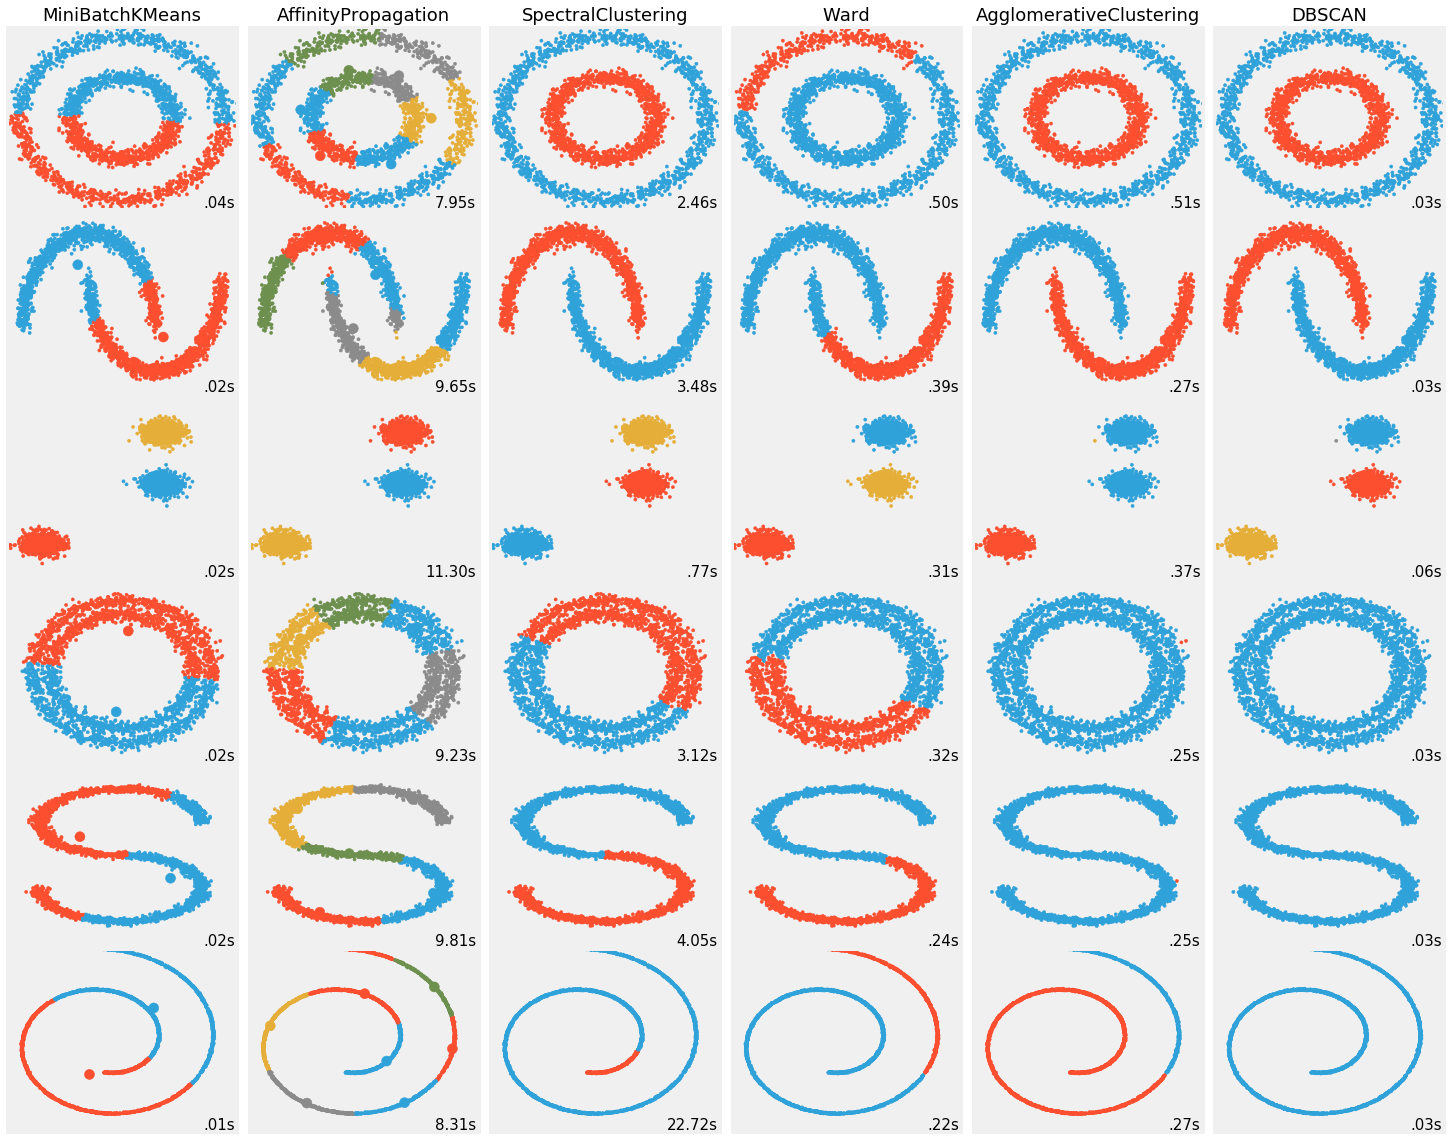

In [11]:
colors = np.array([ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')])
colors = np.hstack([colors] * 200)
plt.figure(figsize=(20, 16))
with plt.style.context('fivethirtyeight'):
    plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    for ii, dataset in enumerate(data_samples):
        X, y = dataset
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # Compute distances
        distances = metrics.euclidean_distances(X)
        if ii == 2:
            n_clusters = 3
        else:
            n_clusters = 2
        # create clustering estimators
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters,
                        linkage='ward', connectivity=connectivity)
        spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                              eigen_solver='arpack',
                                              affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=.2)
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                           preference=-200)

        average_linkage = cluster.AgglomerativeClustering(linkage="average",
                                affinity="cityblock", n_clusters=n_clusters,
                                connectivity=connectivity)

        

        clustering_algos = [
                    ('MiniBatchKMeans', two_means),
                    ('AffinityPropagation', affinity_propagation),
        #           ('MeanShift', ms),
                    ('SpectralClustering', spectral),
                    ('Ward', ward),
                    ('AgglomerativeClustering', average_linkage),
                    ('DBSCAN', dbscan)
                   ]

        for name, algorithm in clustering_algos:
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(clustering_algos), len(data_samples), plot_num)
            if ii == 0:
                plt.title(name, size=18)
            plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

            if hasattr(algorithm, 'cluster_centers_'):
                centers = algorithm.cluster_centers_
                center_colors = colors[:len(centers)]
                plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1
